## Examine real world data

## Real world data issues
Real world data can contain many different issues that can affect the utility of the data and our interpretation of the results.

It's important to realize that most real-world data are influenced by factors that weren't recorded at the time. For example, we might have a table of race-car track times alongside engine sizes, but various other factors that weren't written down, such as the weather, probably also played a role. If problematic, the influence of these factors can often be reduced by increasing the size of the dataset.

In other situations, data points that are clearly outside of what is expected—also known as "outliers"—can sometimes be safely removed from analyses, although care must be taken to not remove data points that provide real insights.

Another common issue in real-world data is bias. Bias refers to a tendency to select certain types of values more frequently than others in a way that misrepresents the underlying population, or "real world". Bias can sometimes be identified by exploring data while keeping in mind basic knowledge about where the data came from.

Real-world data will always have issues, but data scientists can often overcome these issues by:

1. Checking for missing values and badly recorded data
2. Considering removing obvious outliers
3. Examining what real-world factors might affect their analysis and determining if their dataset size is large enough to reduce the impact of these factors
4. Checking for biased raw data and considering their options to fix the bias, if found

## Real world data distributions
Previously, we looked at grades for our student data and estimated from this sample what the full population of grades might look like. Let's refresh our memory and take a look at this data again.

Run the code below to print out the data and make a histogram + box plot that shows the grades for our sample of students.

--2023-04-24 07:40:53--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv’

grades.csv          100%[===================>]     322  --.-KB/s    in 0s      

2023-04-24 07:40:53 (13.9 MB/s) - ‘grades.csv’ saved [322/322]

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   

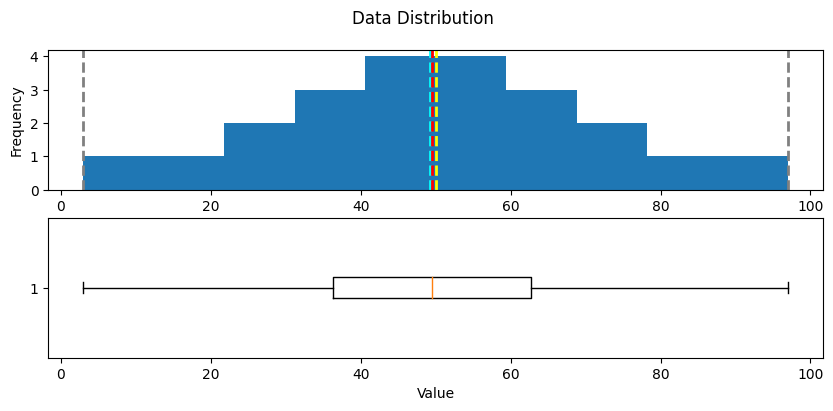

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)


# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

As you might recall, our data had the mean and mode at the center, with data spread symmetrically from there.

Now let's take a look at the distribution of the study hours data.

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



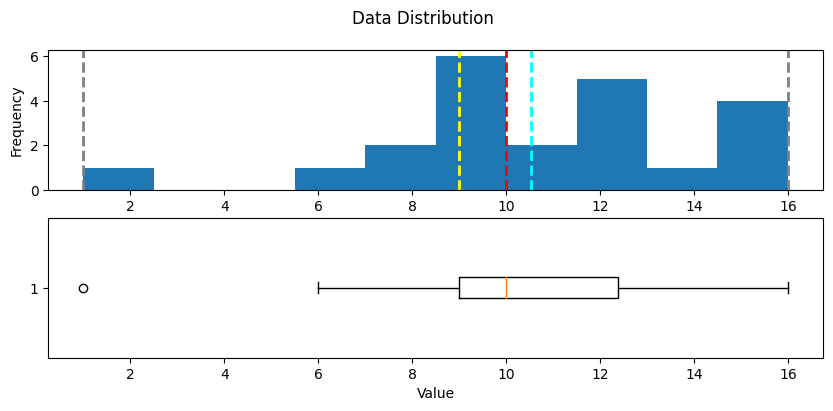

In [ ]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier—a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



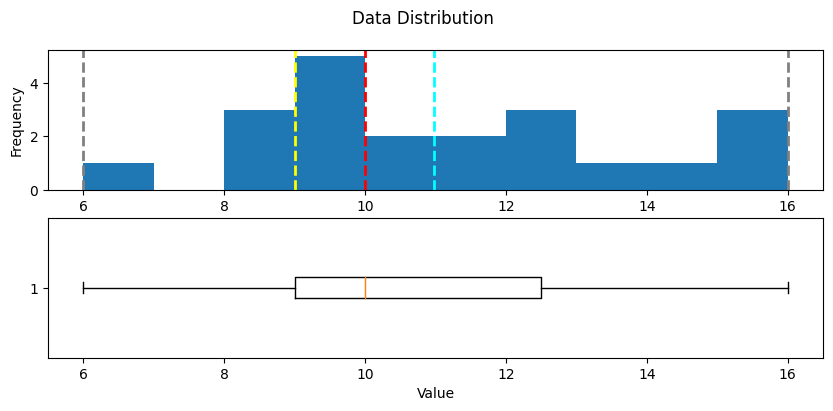

In [ ]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

For learning purposes, we have just treated the value 1 as a true outlier here and excluded it. In the real world, it would be unusual to exclude data at the extremes without more justification when our sample size is so small. This is because the smaller our sample size, the more likely it is that our sampling is a bad representation of the whole population. (Here, the population means grades for all students, not just our 22.) For example, if we sampled study time for another 1,000 students, we might find that it's actually quite common to not study much!

When we have more data available, our sample becomes more reliable. This makes it easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



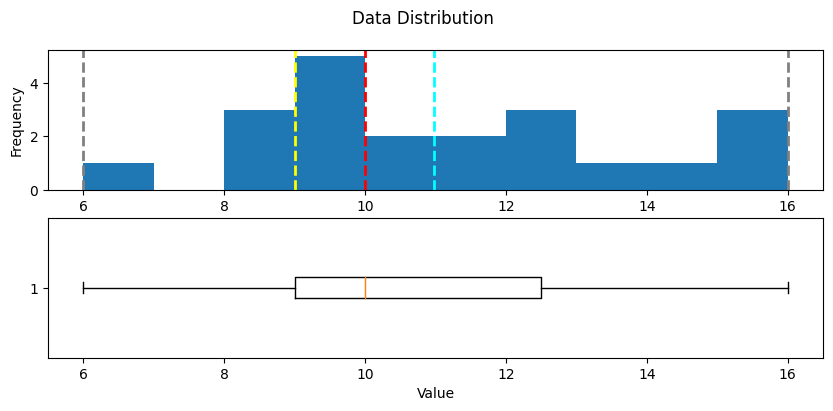

In [ ]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

Tip: You can also eliminate outliers at the upper end of the distribution by defining a threshold at a high percentile value. For example, you could use the quantile function to find the 0.99 percentile below which 99% of the data reside.
With the outliers removed, the box plot shows all data within the four quartiles. Note that the distribution is not symmetric like it is for the grade data. There are some students with very high study times of around 16 hours, but the bulk of the data is between 7 and 13 hours. The few extremely high values pull the mean towards the higher end of the scale.

Let's look at the density for this distribution.

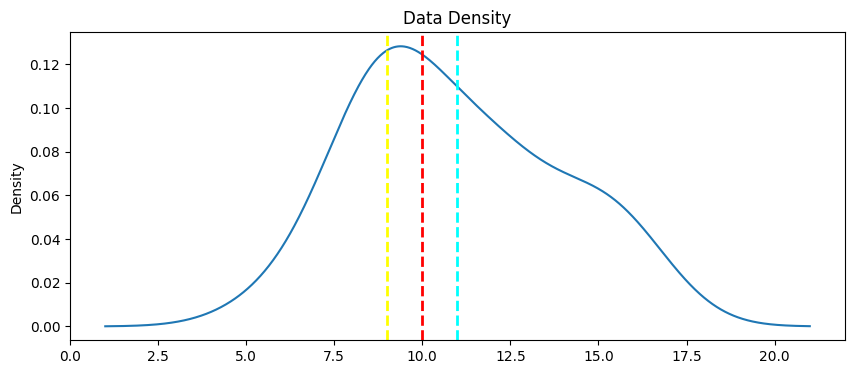

In [ ]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end, which pull the mean to the right.

Measures of variance
So now we have a good idea where the middle of the grade and study hours data distributions are. However, there's another aspect of the distributions we should examine: how much variability is there in the data?

Typical statistics that measure variability in the data include:

Range: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the min and max functions.

Variance: The average of the squared difference from the mean. You can use the built-in var function to find this.

Standard Deviation: The square root of the variance. You can use the built-in std function to find this.

Measures of variance
So now we have a good idea where the middle of the grade and study hours data distributions are. However, there's another aspect of the distributions we should examine: how much variability is there in the data?

Typical statistics that measure variability in the data include:

1. Range: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the min and max functions.
2. Variance: The average of the squared difference from the mean. You can use the built-in var function to find this.
3. Standard Deviation: The square root of the variance. You can use the built-in std function to find this.

In [ ]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Of these statistics, the standard deviation is generally the most useful. It provides a measure of variance in the data on the same scale as the data itself (so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean—in other words, the data is more spread out.

When working with a normal distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight. Run the cell below to see the relationship between standard deviations and the data in the normal distribution.

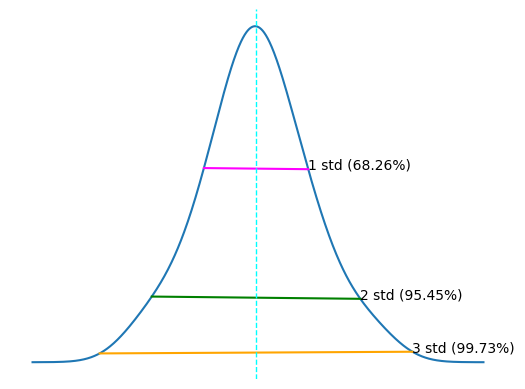

In [ ]:
import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:

1. Approximately 68.26% of values fall within one standard deviation from the mean.
2. Approximately 95.45% of values fall within two standard deviations from the mean.
3. Approximately 99.73% of values fall within three standard deviations from the mean.
So, since we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal, we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.

The descriptive statistics we've used to understand the distribution of the student data variables are the basis of statistical analysis. Because they're such an important part of exploring your data, there's a built-in describe method of the DataFrame object that returns the main descriptive statistics for all numeric columns.



In [ ]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


## Comparing data
Now that you know something about the statistical distribution of the data in your dataset, you're ready to examine your data to identify any apparent relationships between variables.

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [ ]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


## Comparing numeric and categorical variables
The data includes two numeric variables (StudyHours and Grade) and two categorical variables (Name and Pass). Let's start by comparing the numeric StudyHours column to the categorical Pass column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

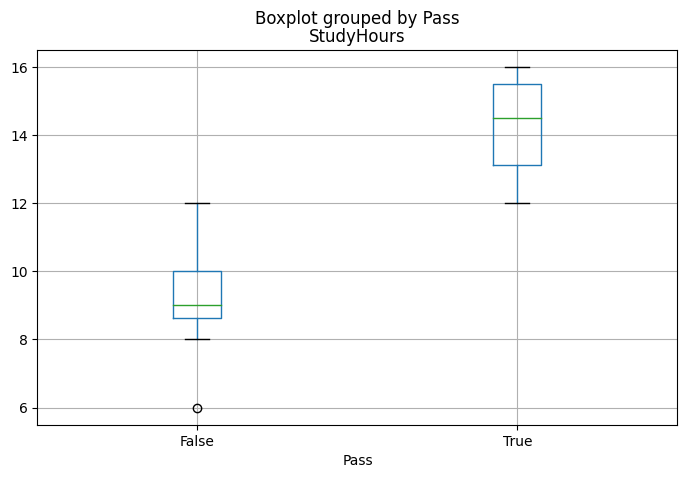

In [ ]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

However, other factors also have importance. We need large, representative data samples that

1. Have zero errors
2. Contain all key information




## What is a data error?
The term 'data errors' refers to incorrect data. Enough data errors can skew a model that it consistently makes incorrect predictions. It's simple: if you put bad data in, you get out bad predictions.

Errors in data are a fact of life, and we can group them in two categories:

The term 'measurement errors' refers to data with low-quality measurements at the data-collection phase. These errors are often subtle and difficult or impossible to eliminate.

The term 'data entry errors' refers to data collected with accuracy, but then incorrectly or inaccurately placed into a spreadsheet or data-management resource incorrectly. Sometimes, we can spot data entry errors more easily than we can spot measurement errors. For example, we might measure someone as 1.8 meters tall, but miss the decimal place and write 18 meters. We can easily see the error because a tree-sized person is unrealistic.

The data is incomplete because of a missing sample: Tom. Additionally, the data for Reece doesn't show the height of Reece.

Ideally, we always work with complete data, but we don't always have complete data available to us. For incomplete data, we can:

Choose a model that can work with incomplete data, or
Remove samples (rows) that have incomplete data, and work with the remaining data, or
Artificially add values as reasonable substitutes for the missing data
Most times, picking a model that can handle missing data is best, although this is not always possible. Removal of incomplete data is the easiest approach, and it usually works, although we must be careful that removal of data doesn't cause a sample to misrepresent the population. Adding data in artificially is usually a method of last resort.

In the next unit, we'll work with our Titanic dataset, identifying and patching up incomplete data.

## Visualizing missing data

In [ ]:
import pandas as pd
!pip install missingno

# Load data from our dataset file into a pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-06-05 12:08:04--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.004s  

2023-06-05 12:08:04 (15.0 MB/s) - ‘titanic.csv’ saved [61194/61194]

--2023-06-05 12:08:04--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercon

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Shape tells us how many rows and columns we have
print(dataset.shape)

(891, 12)


A better option would use pandas to report the columns that have "empty" cells:

In [ ]:
# Calculate the number of empty cells in each column
# The following line consists of three commands. Try
# to think about how they work together to calculate
# the number of missing entries per column
missing_data = dataset.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Data Visualizations
Sometimes it can help if we can see if the missing data form some kind of pattern.

We can plot the absence of data in a few ways. One of the most helpful is to literally plot gaps in the dataset:



<Axes: >

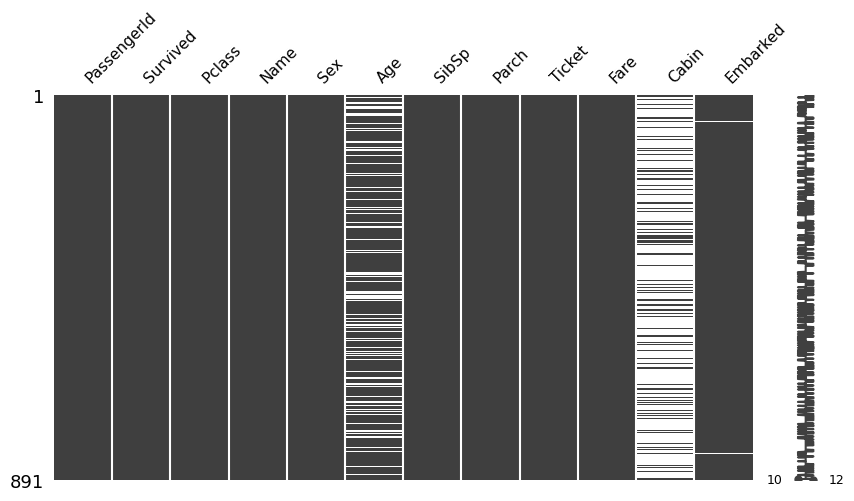

In [ ]:
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(10,5), fontsize=11)

In [ ]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value
unknown_age = dataset[dataset["Age"].isnull()]

# Print only the columns we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


This technique lists the passengers with missing Cabin or Embarked information as well. Let's combine these using an AND, to see how many passengers are missing both Cabin and Age information

In [ ]:
# Find those passengers with missing age or cabin information
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Find those passengers missing both
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


Our suspicions were correct - most passengers missing age information are also missing cabin information.

Normally, from here, we would want to know why we have this issue. A good hypothesis is that information was not collected carefully enough for the passengers who used the cheap tickets.

Let's plot a histogram of ticket classes, and another of just people missing information.

In [ ]:
import graphing

# The 'graphing' library is custom code we use to make graphs
# quickly. If you don't run this notebook in the sandbox
# environment, you might need to formally install this library
# in the environment you use. See the first cell of this notebook
# for more information about installation of the 'graphing'
# library.
#
# To review the 'graphing' library in detail, find it in our
# GitHub repository

graphing.histogram(dataset, 'Pclass', title='Ticket Class (All Passengers)', show=True)
graphing.histogram(unknown_age_and_cabin, 'Pclass', title='Ticket Class (Passengers Missing Cabin and Age Information)')

It seems that those passengers with missing information typically used the cheaper tickets. These sorts of biases might cause problems in real-world analyses.

## Missing as zero

In [ ]:
import numpy as np

# Print out the average age of passengers for whom we have age data
mean_age = np.mean(dataset.Age)
print("The average age on the ship was", mean_age, "years old")

# Now, make another model where missing ages contained a '0'
dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age = np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


In [ ]:
graphing.histogram(dataset, label_x="Age_2")

Here, we see an unlikely number of very young children. This would be cause for further inspection of the data, to hopefully spot the fact that the missing ages appear as zeros.

## Deealing with missing data
Option 1: Delete data with missing rows

In [ ]:
# Create a "clean" dataset, where we cumulatively fix missing values
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


## Option 2: Replace empty values with the mean or median for that data.
Sometimes, our model cannot handle missing values, and we also cannot afford to remove too much data. In this case, we can sometimes fill in missing data with an average calculated on the basis of the rest of the dataset. Note that imputing data like this can affect model performance in a negative way. Usually, it's better to simply remove missing data, or to use a model designed to handle missing values.

Below, we impute data for the Age field. We use the mean Age from the remaining rows, given that >80% of these aren't empty:

In [ ]:
# Calculate the mean value for the Age column
mean_age = clean_dataset["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_dataset["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

The mean age is 29.64209269662921
             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


## Option 3: Assign a new category to unknown categorical data
For this exercise, it makes perfect sense to create an Unknown category, and assign it to the cases where the cabin is unknown:

In [ ]:
# Assign unknown to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


## Summary
Missing values can affect the way a Machine Learning model works in a negative way. It's important to quickly verify the existence of data gaps, and the locations of those gaps.

You can now get a "big picture" of what is missing, and select only those items that you must address, by the use of lists and charts.

In this exercise, we practiced:

Finding and visualization of missing dataset values, using the pandas and missingno packages.
Checking whether a dataset uses the value '0' to represent missing values.
Handling missing data in three ways: removing of rows that contain missing values, replacment of the missing values with the mean or median of that particular feature, and creation of a new Unknown category, if dealing with categorical data.
# Continuous, ordinal, and categorical data
For data operations, we sometimes need awareness of what exactly the data represents. This awareness can help us choose the right machine learning model. It can also help us organize our data in specific, helpful ways.

Continuous data refers to numerical information that can increase or decrease by any amount. For example, you can add 1 millimeter to 1 meter, and calculate a sum as 1.001 meters.

Categorical data refers to data that doesn’t fall on a continuous spectrum. In our scenario, the data categorizes the people on the Titanic as “staff” or “passengers”. Categorical data can’t be stored as numbers in a clearly obvious way.

Ordinal data refers to categorical data that have a defined order, and can therefore support storage as numerical values. For example, we can define values of big, medium, and small as ordinal data because we can numerically rank them: significant > medium > small. By contrast, the values apple, orange and coconut are categorical because we can't rank them. Ordinal data can also refer to numbers that can increase or decrease, but only by set amounts. For example, the number of people boarding a boat is guaranteed to be a whole number: no one can half board.

IDs refer to a special type of categorical data where each sample has its own unique ID. For example, in our dataset, each person on the Titanic has a given ID value, even if that person has the same name as someone else. Identity values help us navigate in a dataset, but our data analysis won't directly involve those values.

In [ ]:
import graphing

graphing.histogram(dataset, label_x='Pclass', label_y='Survived', histfunc='avg', include_boxplot=True)


In [6]:
import plotly.graph_objects as go
import numpy as np

# Create some simple functions
# Read their descriptions to find out more 
def get_rows(sex, port):
    '''Returns rows that match in terms of sex and embarkment port'''
    return dataset[(dataset.Embarked == port) & (dataset.Sex == sex)]

def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["C", "Q", "S" ] * 2

# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# Calculate the proportion of passengers from each port + sex combination who survived
passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# Combine into a single data frame
table = pd.DataFrame(dict(
    sex=sexes,
    port=ports,
    passenger_count=passenger_count,
    passenger_survival_rate=passenger_survival
))

# Make a bubble plot
# This is just a scatter plot but each entry in the plot 
# has a size and colour. We set colour to passenger_survival 
# and size to the number of passengers 
graphing.scatter_2D(table, 
                    label_colour="passenger_survival_rate", 
                    label_size="passenger_count", 
                    size_multiplier=0.3,
                    title="Bubble Plot of Categorical Data")

It appears that women have a much higher survival rate than men, but there were more men on the ship.

We can also see that most people boarded at Port S ("Southampton"). It does seem that there is a weak relationship between the port of boarding and survival.

In [ ]:
import graphing